# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 5</p> (Finally the final homework this semester, yay!)
## <p style="text-align: center;">Total points: 55 </p>
## <p style="text-align: center;">Due: Monday, **Nov 29th** submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). 

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

**This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework. Put your name and eid here.**

Name: Shubham Singh

EID: ss96589

# Question 1: Ensembles Conceptual (5 pts)
Briefly describe the concepts of Gradient Boosting in your own words. How does it differ from Adaboost?

## Answer: 
Ada boost is a exponential loss based additive generative model. It uses a sequential approach where it trains a simple model on the residual of the previous trained models without affecting the previous models.

Gradient boost follows the same startegy with some logic based numerical alterations.It defines the holistic loss function between observed value yi and set of basis functions f(xi)'s in a optimization way. It tries to figure out set of functions f(0) to f(m), ran till mth iteration, that will help reduce the entire loss.

The initial guess f(0) is a simple statistic of the entire sample. Following functions are primarily the regression trees that tries to learn the gradient of error generated by previous functions.
For each iteration the sample space is divided into partitions and gradient of error for each sub partition is then regressed using MSE based split criterion of a tree.

Finally,these learnt error deltas, across partitions, are assembled. Following they are added for each iteration to produce a final output.


### Comparison of Two models
Both adaboost and gradient boost are generative in nature and also greedily learn about the residual/ error at each step. However, Gradient boosting can create independent learning for each partition at every iteration. This is not the case in Adaboost where the entire dataset learn about the prediction of error at a given iteration step.
The tree can be trained for many depths in gradient boost, whereas a weak learner, stump(h=2) depth tree is expected at each iteration in adaboost.
Also the concept of sample weighing is more transparent in ada boost. In gradient boosting the concept is slightly elusive where the learning is performed on the error and not on the weighted residuals.



# Question 2: SVM (25 pts)
Support Vector Machine (SVM) is a supervised machine learning algorithm that can be used for both classification and regression. In this problem, you will be playing with SVM on the sklearn wine dataset to explore the impacts of different parameters.

**a) (5 pts)** Implement the `train_model()` function. This function takes as input:

- X (the features)
- y (the labels)
- kernel (the specified kernel type, default value is `'linear'`)
- C (the penalty parameter, default value is 1
)
- gamma (the kernel coefficient, default value is 0.5). 

The `train_model()` function should fit a [svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) model and return the trained model. After implementing `train_model()`, use the `plot_model()` function provided below to plot the results of your model.

**b) (10 pts)** The `kernel` parameter decides what form the input data will be transformed into, and may affect how your trained SVM model performs. In (a), the default value for `kernel` is `'linear'`, now re-train your svm model as you did in (a), but this time, use `'rbf'` as the `kernel`, while keeping `C=1, gamma=0.5` still. Use the provided `plot_model()` function to plot the results of your model. What do you observe?

**c) (10 pts)** The `'gamma'` is a hyper-parameter needed for `'rbf'` kernel, which specifies the width of the Gaussian Kernel. Now experiment with different gamma values `[0.5, 1, 10, 100]`, use `'rbf'` as the `kernel`, while keeping `C=1`. Train your SVM and use the provided `plot_model()` function to plot the results of your model. What do you observe from the plot as gamma increases? 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import accuracy_score

# load data
wine = datasets.load_wine()
# only take the first two features
X = wine.data[:, :2]
y = wine.target
# np.unique(y)

In [ ]:
def plot_model(X, y, svc, kernel='linear'):
# You don't need to implement this function, this has been implemented and is just for plotting the trained model.

# Input: 
#  - X: data features 
#  - y: the labels
#  - svc: the trained svm.SVC model
#  - kernel: specified kernel type, default value is 'linear'

  x0_min, x0_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  x1_min, x1_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = (x0_max / x0_min)/100
  xx0, xx1 = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))

  plt.subplot(1, 1, 1)
  y_pred = svc.predict(np.c_[xx0.ravel(), xx1.ravel()])
  y_pred = y_pred.reshape(xx0.shape)
  plt.contourf(xx0, xx1, y_pred, cmap=plt.cm.Paired, alpha=0.2)

  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
  plt.xlabel('Alcohol')
  plt.ylabel('Malic Acid')
  plt.xlim(xx0.min(), xx0.max())
  plt.title('SVC with {} kernel'.format(kernel))
  plt.show()
  return plt


In [ ]:
from sklearn.svm import SVC

def train_model(X, y, kernel='linear', C=1, gamma=0.5):
  svc=SVC(kernel=kernel,C=C,gamma=gamma)
  svc.fit(X,y)
  return svc

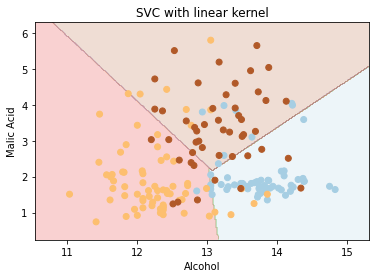

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
svc = train_model(X, y, kernel='linear', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='linear')

## Answer b:


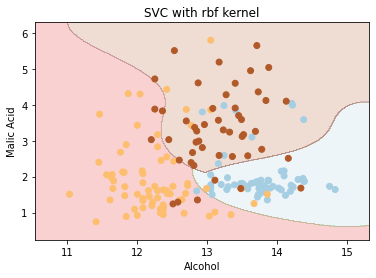

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='rbf')


On using a non linear transformation via rbf kernel, we observed the changes in the separating boundaries that divide the present classes.

SVM uses an implicit kernel technique to generate non-linear features from the provided original datset following learn and construct boundaries associated with those transformed features.
This overall method helps in formulating a non-linear discriminant boundaries for the original sets of variable.

For example there is a possibility of linear separation in higher polynomial orders of a variable set.This can be translated into non linear transformation for the original set.

SVM using RBF or other kernel transformation helps to establish such non-linear boundaries for the raw dataset.

We can observe that the boundaries are able to better capture some of the samples. This was not the case when we were using simple linear transformation for the raw dataset.




# Answer c


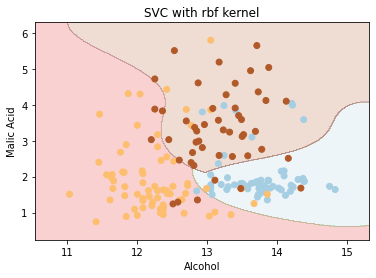

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=0.5)
plot_model(X, y, svc, kernel='rbf')


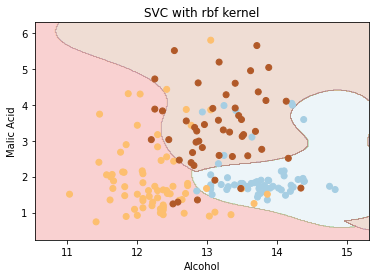

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=1)
plot_model(X, y, svc, kernel='rbf')

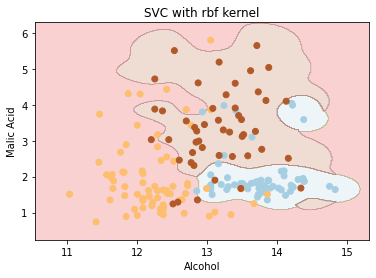

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=10)
plot_model(X, y, svc, kernel='rbf')

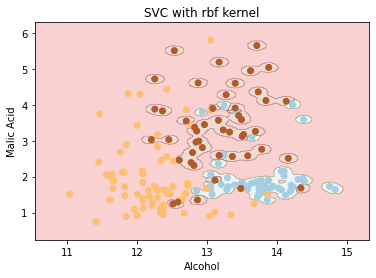

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
svc = train_model(X, y, kernel='rbf', C=1, gamma=100)
plot_model(X, y, svc, kernel='rbf')


Gamma parameter seems to be an inverse function of variance of radial function. Thus as we increase gamma from 0.5 to 100, we can observe that the influence of each training instance on the model turns more localised. 
Indeed for the higher values of gamma, i.e 100, we can observe that the boundaries are restricted to the close proximity of the training observation, this in turn is a highly biased/overdetermined model.

For lower values of gamma,0.05, one can observe that a few evident blue points are not able to be captured in the right region because of high influence of their red neighbour.
If we reduce variance of influence or increase gamma then we can construct an appropriate boundary around those points.

Thus a striking balance need to be determined, post experimenting on the training dataset, for a mid range gamma value that does not leave points casually in other zone and even does not overpredict the zones.

# Question 3: Ensemble methods for classification (25 pts)

In this question, we will compare the performances of different ensemble methods for classification: Bagging, AdaBoost, GradientBoosting. 

The dataset used is [Spam Classification Data](https://archive.ics.uci.edu/ml/datasets/Spambase), which you can load from `spam_uci.csv` file. The last column represents the target label, where 1 means spam and 0 otherwise. You can use the provided codes to load the data and split training/test sets.

**a) (5 pts)** Fit a [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) with `random_state=10`,  and a [Logistic Regression Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) with `random_state=10` and `solver="newton-cg"` for the spam classification problem. For each classifier, report the [accuracy_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) and [roc_auc_score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html#sklearn.metrics.roc_auc_score) on the test data. 
**Note**: Before computing roc_auc_score, you will need [`predict_proba(X_test)[:, 1]`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.predict_proba) to obtain the predicted target scores first.


**b) (5 pts)** For **each** classifier in (a), use [Bagging](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) to create an ensemble of 50 classifiers (i.e `n_estimators=50`) with `random_state=10`, report the accuracy_score and roc_auc_score on the test data. Compare the scores with what you obtained in (a), briefly describe the impact of Bagging on both classifiers.


**c) (5 pts)** Fit a [Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) for the spam classification problem. Use [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) to find the best combination of hyperparameters from `{"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}`. As what you did in (a), report the accuracy_score and roc_auc_score on the test data. 


**d) (6 pts)** Fit a [GradientBoosting Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html), and an [AdaBoost Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html#sklearn.ensemble.AdaBoostClassifier) for the spam classification problem. Use GridSearchCV to find the best combination of hyperparameters for each classifier: 
- For GradientBoosting, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}`;
- For AdaBoost, find the best combination from `{"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}`. 

Report the accuracy_score and roc_auc_score on the test data for each classifier. The GridSearchCV may take some time, especially for GradientBoostingClassifier.

**e) (4 pts)** In (c) and (d), you have obtained the best combination of hyperparameters respectively for Random Forest Classifier, Gradient Boosting Classifier and AdaBoost Classifier. 

Please use the best hyperparameters to initialize your classifiers, train your model, compute the accuracy_score and roc_auc_score on the test data, and plot the `accuracy_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in one plot, and plot the `roc_auc_scores` of the three classifiers vs `n_estimators= [10, 100, 500]` in another plot. That is, keep all other hyperparameters (except for `n_estimators`) as the best hyperparameters you obtained in (c) and (d), plot how the accuracy_score and roc_auc_score changes as you change the number of estimators (`n_estimators`).


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

data = pd.read_csv('spam_uci.csv', index_col=0)
print(data.shape)

X = data.iloc[:, :56]
y = data.iloc[:, 57]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

(4601, 58)


## Answer a:




In [ ]:
dt_c=DecisionTreeClassifier(random_state=10)
lr_c=LogisticRegression(random_state=10,solver='newton-cg')

dt_c.fit(X_train,y_train)
lr_c.fit(X_train,y_train)

y_dt_pred=dt_c.predict(X_test)
y_lr_pred=lr_c.predict(X_test)

print('accuracy_score_DTC-->',accuracy_score(y_test,y_dt_pred),sep='\t\t')
print('accuracy_score_LRC-->',accuracy_score(y_test,y_lr_pred),sep='\t\t',end='\n\n\n')

print('ROC_AUC_score_DTC-->',roc_auc_score(y_test,dt_c.predict_proba(X_test)[:,1]),sep='\t\t')
print('ROC_AUC_score_LRC-->',roc_auc_score(y_test,lr_c.predict_proba(X_test)[:,1]),sep='\t\t',end='\n\n\n')


accuracy_score_DTC-->		0.9098090849242922
accuracy_score_LRC-->		0.9315339038841343


ROC_AUC_score_DTC-->		0.9040453749567611
ROC_AUC_score_LRC-->		0.9734682742610166




## Answer b:

In [ ]:
from sklearn.ensemble import BaggingClassifier as bagging 
dt_bag=bagging(dt_c,n_estimators=50)
lr_bag=bagging(lr_c,n_estimators=50)


dt_bag.fit(X_train,y_train)
lr_bag.fit(X_train,y_train)

y_dt_pred=dt_bag.predict(X_test)
y_lr_pred=lr_bag.predict(X_test)

print('accuracy_score_DTC-->',accuracy_score(y_test,y_dt_pred),sep='\t\t')
print('accuracy_score_LRC-->',accuracy_score(y_test,y_lr_pred),sep='\t\t',end='\n\n\n')

print('ROC_AUC_score_DTC-->',roc_auc_score(y_test,dt_bag.predict_proba(X_test)[:,1]),sep='\t\t')
print('ROC_AUC_score_LRC-->',roc_auc_score(y_test,lr_bag.predict_proba(X_test)[:,1]),sep='\t\t',end='\n\n\n')





accuracy_score_DTC-->		0.9420671494404214
accuracy_score_LRC-->		0.9361421988150099


ROC_AUC_score_DTC-->		0.9794245397066532
ROC_AUC_score_LRC-->		0.9762516091990914




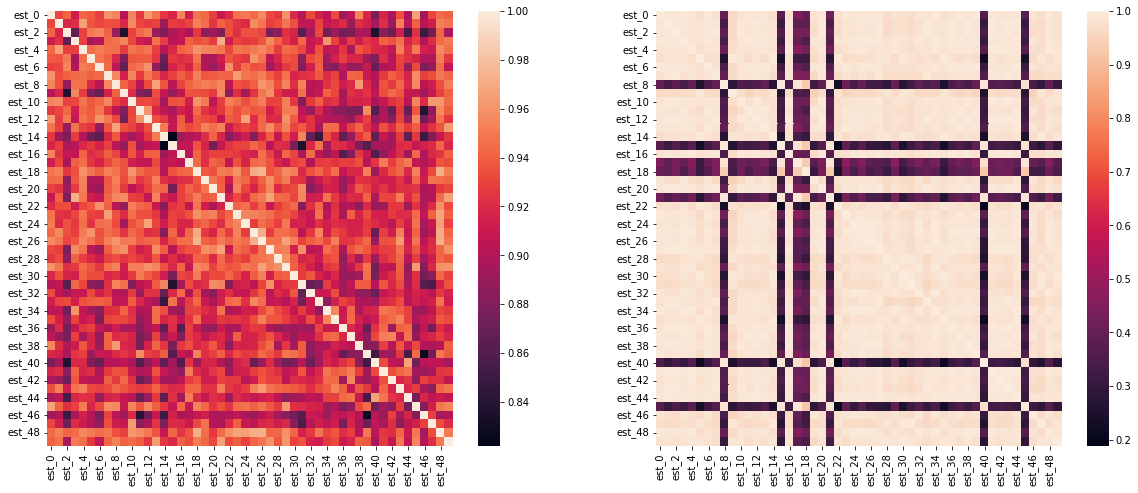

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

_,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(pd.DataFrame({f'est_{i}':lr_bag.estimators_[i].coef_.reshape(-1) for i in range(50)}).corr(),ax=ax[0])
sns.heatmap(pd.DataFrame({f'est_{i}':dt_bag.estimators_[i].feature_importances_.reshape(-1,) for i in range(50)}).corr(),ax=ax[1])

# dt_bag.estimators_[0].feature_importances_.reshape(-1,)

# OBSERVATION
The coefficient values of 50 sets of logistic regression classifiers used in the bagging are havily correlated with each other
Thus there is less degree of variation between each predictor of the bagged clasifier and the amount of ambiguity is low, thus the improvemnt in MSE is presumed to be low which is also reflected through the negligible improvement of AUC and ROC scores

However, the correlation of feature importances of 50 decision trees, shows some variation. Some of the pairs of estimators are not correlated in terms of their prediction characteristic with each-other.
Thus there was a presence of ambiguity, which helped to improve the prediction power of the assembled models.

Thus we can observe higher degree of imporvemnet in decision trees bagged classifiers as compared to logistic regression based bagged classifiers.






## Answe c:

In [ ]:
dict_params={"n_estimators": [10, 100, 500], "criterion": ['gini', 'entropy'], "random_state": [42]}
rfc=RandomForestClassifier()

gs_rfc=GridSearchCV(rfc,param_grid=dict_params)
gs_rfc.fit(X_train,y_train)

y_pred=gs_rfc.predict(X_test)

print('accuracy_score-->',accuracy_score(y_test,y_pred),sep='\t\t',end='\n\n\n')
print('ROC_AUC_score_LRC-->',roc_auc_score(y_test,gs_rfc.predict_proba(X_test)[:,1]),sep='\t\t',end='\n\n\n')



accuracy_score-->		0.9552337063857801


ROC_AUC_score_LRC-->		0.9891234188838844




## Answer d:

In [ ]:
dict_params_grad={"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "max_depth":[3, 5, 10], "subsample":[0.5, 0.7, 1.0], "random_state":[42]}

clf=GradientBoostingClassifier()

gs_gbc=GridSearchCV(clf,param_grid=dict_params_grad)
gs_gbc.fit(X_train,y_train)

y_pred=gs_gbc.predict(X_test)

print('accuracy_score-->',accuracy_score(y_test,y_pred),sep='\t\t',end='\n\n\n')
print('ROC_AUC_score_LRC-->',roc_auc_score(y_test,gs_gbc.predict_proba(X_test)[:,1]),sep='\t\t',end='\n\n\n')


dict_params_ada={"n_estimators":[10, 100, 500], "learning_rate":[0.01, 0.1, 0.5], "random_state":[42]}

clf=AdaBoostClassifier()

gs_abc=GridSearchCV(clf,param_grid=dict_params_ada)
gs_abc.fit(X_train,y_train)

y_pred=gs_abc.predict(X_test)

print('accuracy_score-->',accuracy_score(y_test,y_pred),sep='\t\t',end='\n\n\n')
print('ROC_AUC_score_LRC-->',roc_auc_score(y_test,gs_abc.predict_proba(X_test)[:,1]),sep='\t\t',end='\n\n\n')



accuracy_score-->		0.9552337063857801


ROC_AUC_score_LRC-->		0.9889094533537314


accuracy_score-->		0.9512837393021725


ROC_AUC_score_LRC-->		0.9858836241481498




## Answer e:

In [ ]:
rfc=RandomForestClassifier()

best_param_dict={'n_estimators':gs_rfc.get_params()['estimator__n_estimators'],
                'criterion':gs_rfc.get_params()['estimator__criterion'],
                'random_state':gs_rfc.get_params()['estimator__random_state'],
                }
rfc.set_params(**best_param_dict)


gbc=GradientBoostingClassifier()

best_param_dict={'n_estimators':gs_gbc.get_params()['estimator__n_estimators'],
                'learning_rate':gs_gbc.get_params()['estimator__learning_rate'],
                 'max_depth':gs_gbc.get_params()['estimator__max_depth'],
                 'subsample':gs_gbc.get_params()['estimator__subsample'],
                'random_state':gs_gbc.get_params()['estimator__random_state'],
                }
gbc.set_params(**best_param_dict)


abc=AdaBoostClassifier()

best_param_dict={'n_estimators':gs_abc.get_params()['estimator__n_estimators'],
                'learning_rate':gs_abc.get_params()['estimator__learning_rate'],
                'random_state':gs_abc.get_params()['estimator__random_state'],
                }
abc.set_params(**best_param_dict)

AdaBoostClassifier()

In [ ]:
acc_scores=pd.DataFrame(index=list(map(str,[10,100,500,900])),
             columns=['rfc','gbc','abc'])
roc_scores=pd.DataFrame(index=list(map(str,[10,100,500,900])),
             columns=['rfc','gbc','abc'])
lt_models=[rfc,gbc,abc]
for i in range(3):
  for ii,est in enumerate([10,100,500,900]):
    temp_model=lt_models[i]

    temp_model.set_params(**{
        'n_estimators':est
    })
    temp_model.fit(X_train,y_train)
    y_pred=temp_model.predict(X_test)

    temp_acc=accuracy_score(y_test,y_pred)
    temp_roc=roc_auc_score(y_test,temp_model.predict_proba(X_test)[:,1])

    roc_scores.iloc[ii,i]=temp_roc
    acc_scores.iloc[ii,i]=temp_acc





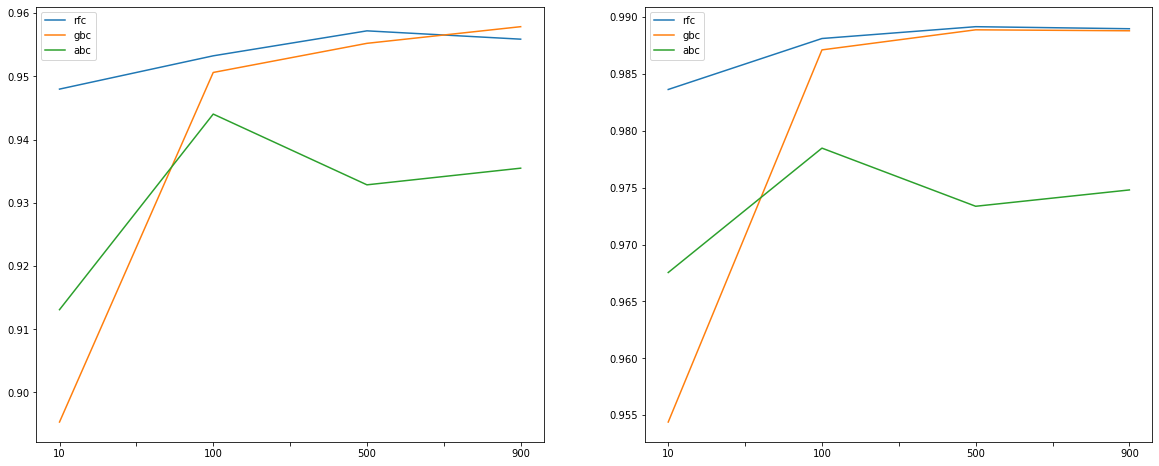

In [ ]:
_,ax=plt.subplots(1,2,figsize=(20,8))

acc_scores.plot(ax=ax[0])
roc_scores.plot(ax=ax[1])

# Rough Work

In [ ]:
# # np.c_[np.arange(1,2,0.1),np.linspace(1,2,10)]
# np.concatenate([np.arange(5).reshape(-1,1),np.arange(5,10).reshape(-1,1)],axis=1)
# np.c_[np.arange(5),np.arange(5,10)]

In [ ]:
# gs_gbc.get_params()['estimator__n_estimators']
# print(gs_gbc.get_params()['estimator__random_state'])